In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spamdetection/spam.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report, roc_auc_score, roc_curve
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
sns.set_theme(context='notebook',
             style='whitegrid',
             palette='seismic',
             font='Lucida Calligraphy',
             font_scale=1.5,
             rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8,8]
matplotlib.rcParams.update({'font.size': 15})

In [4]:
data = pd.read_csv("/kaggle/input/spamdetection/spam.csv",encoding='latin-1')
print(data.head())

     c1                                                 c2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
data.shape
data.size

27860

In [6]:
data['c1'].value_counts()

c1
ham     4825
spam     747
Name: count, dtype: int64

Text(0.5, 1.0, 'c1')

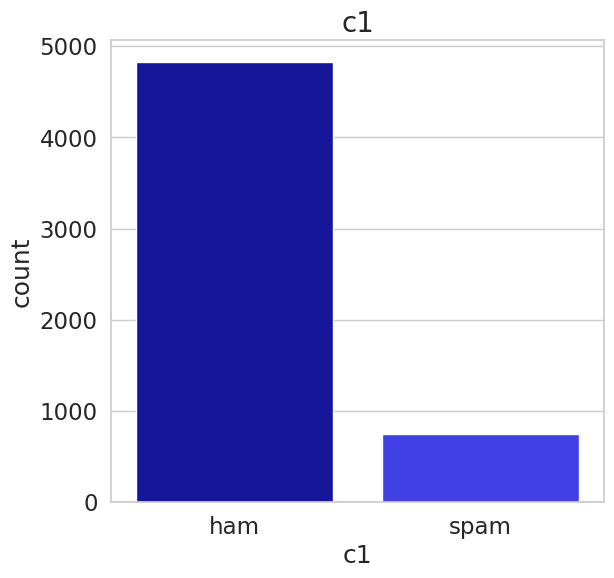

In [7]:
plt.figure(figsize=(14,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='c1', data= data)
plt.title("c1",fontsize=20)

In [8]:
# Remove missing values
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [9]:
# Remove duplicates
data = data.drop_duplicates(keep='first')

In [10]:
data.duplicated().sum()

0

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [12]:
source = data['c2']
target = data['c1']
target = target.replace("ham",0)
target = target.replace("spam",1)

text_data = np.array(source)
text_data

count = CountVectorizer(max_features=6000)
count.fit(text_data)

bag_of_words = count.transform(text_data)
X = bag_of_words.toarray()

y = np.array(target)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')


In [13]:
data['num_characters'] = data['c2'].apply(len)
print(data['num_characters'])

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64


In [14]:
data['num_words'] = data['c2'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_words']

0       23
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [15]:
data['num_sentences'] = data['c2'].apply(lambda x: len(nltk.sent_tokenize(x)))
print(data['num_sentences'])

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64


In [16]:
data[data['c1'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


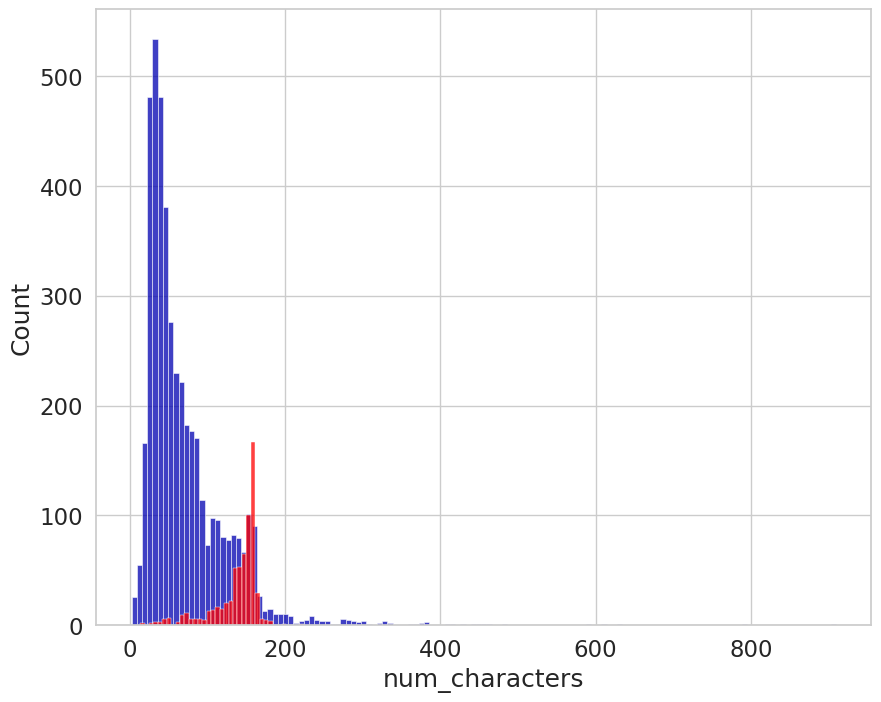

In [17]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(data[data['c1'] == 'ham']['num_characters'])
sns.histplot(data[data['c1'] == 'spam']['num_characters'],color='red')
plt.show()


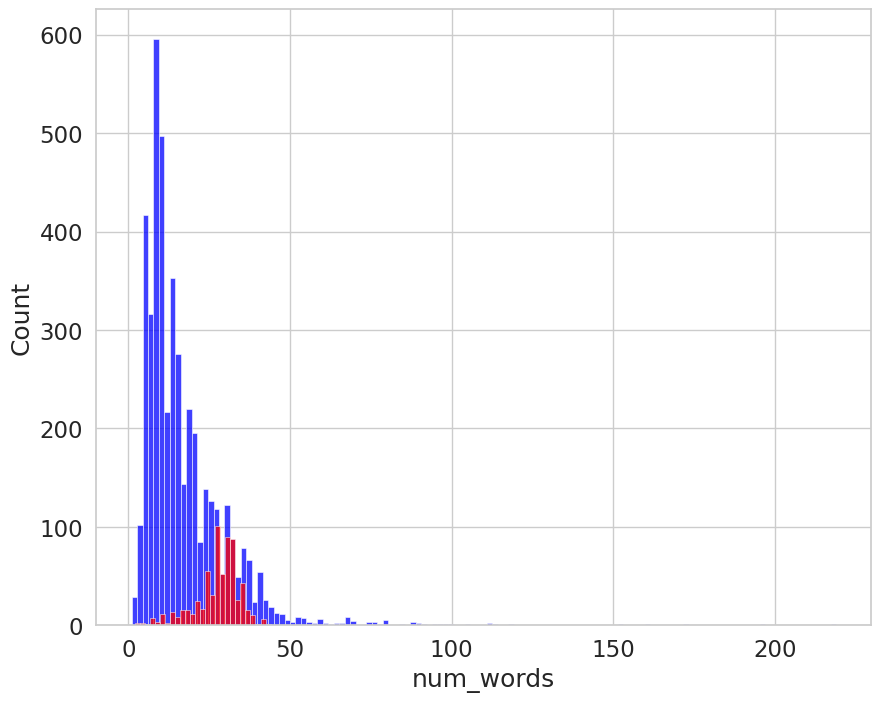

In [18]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(data[data['c1'] == 'ham']['num_words'],color='blue')
sns.histplot(data[data['c1'] == 'spam']['num_words'],color='red')
plt.show()

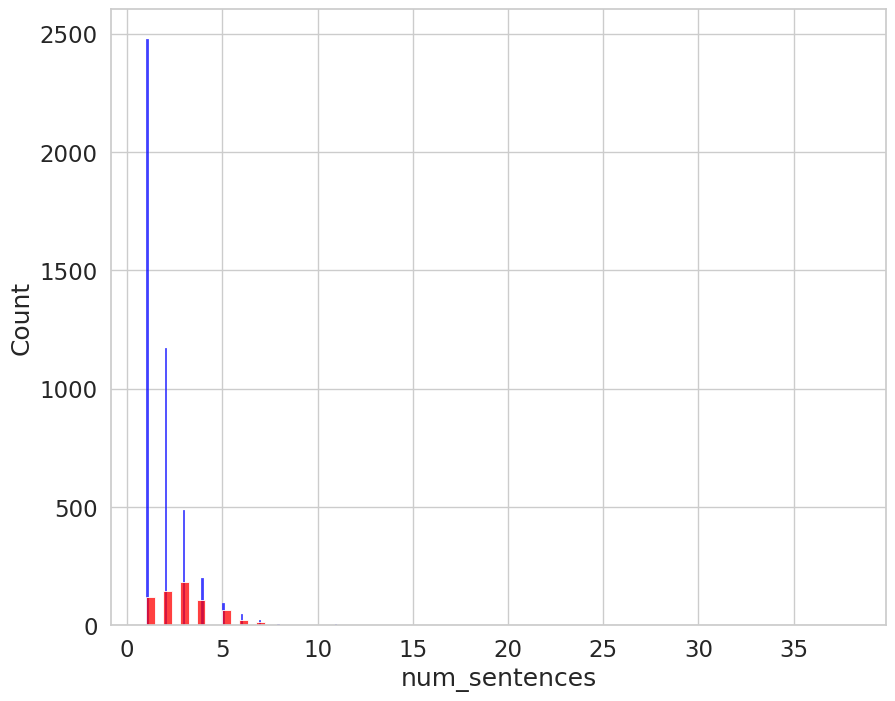

In [19]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(data[data['c1'] == 'ham']['num_sentences'],color='blue')
sns.histplot(data[data['c1'] == 'spam']['num_sentences'],color='red')
plt.show()

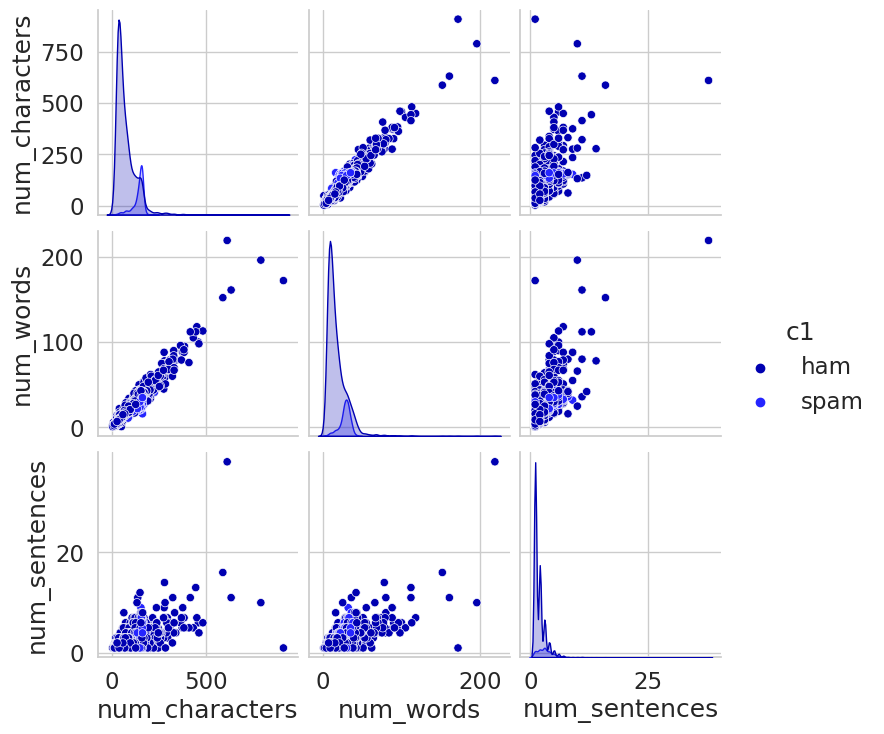

In [20]:
sns.pairplot(data,hue='c1')
plt.show()

In [21]:
df_spam = data[data.c1 == 'spam'].copy()
df_ham = data[data.c1 == 'ham'].copy()
import wordcloud

def generate_wordcloud(data_frame,c1):
    text = ' '.join(data_frame['c2'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(c1, fontsize=20 )
    plt.show()

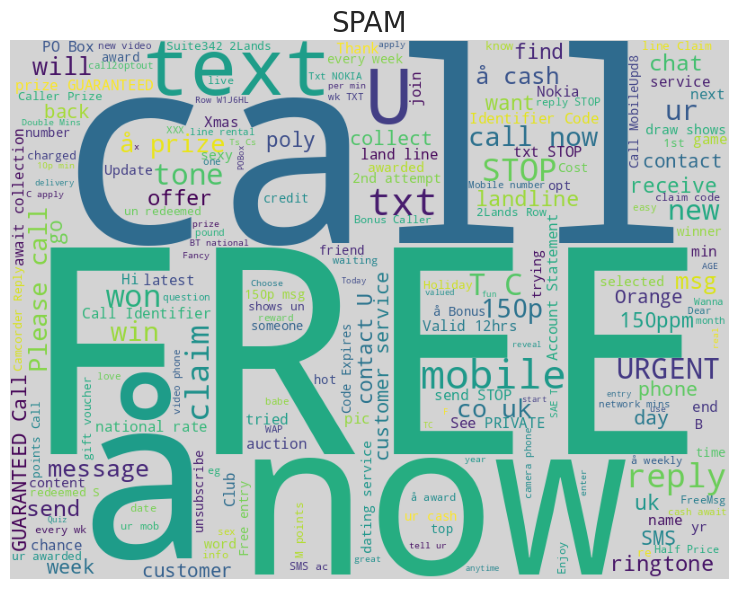

In [22]:
generate_wordcloud(df_spam,'SPAM')

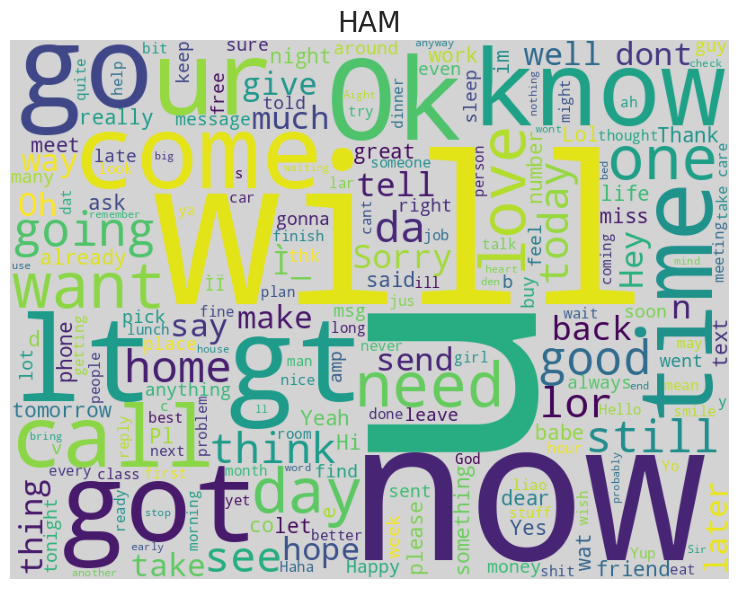

In [23]:
generate_wordcloud(df_ham,'HAM')

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

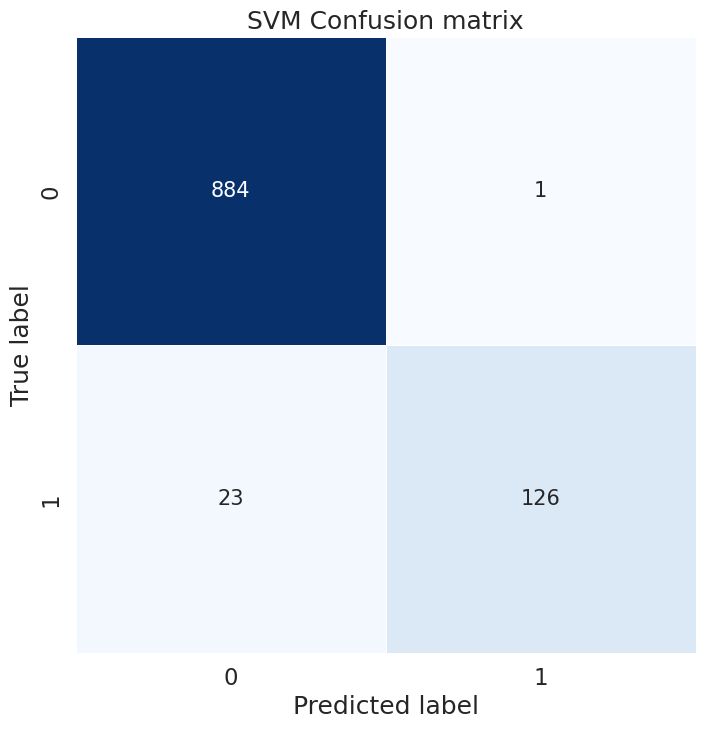

[[884   1]
 [ 23 126]]
SVM Accuracy score:
Train Score: 0.9949
Train Score: 0.9768
Accuracy: 0.9768
 
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       885
           1       0.99      0.85      0.91       149

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

SVM ROC Accuracy: 0.9223
 
SVM ROC Curve:


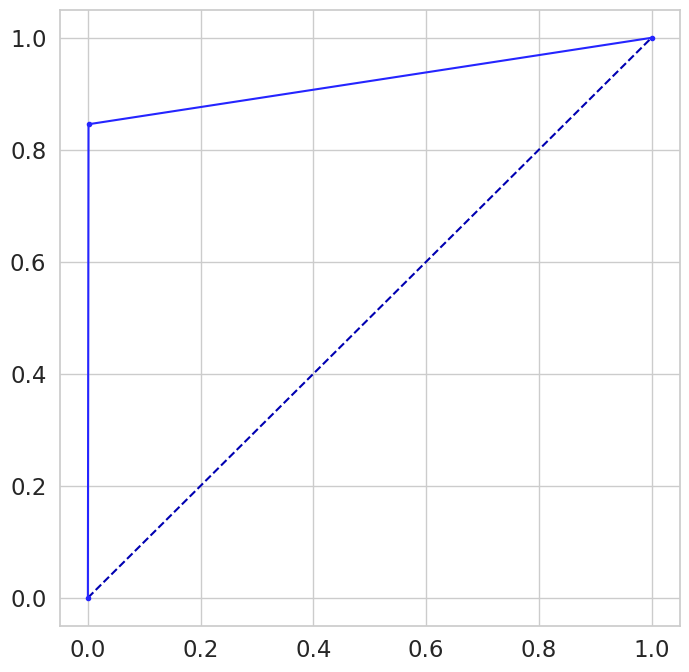

In [25]:
#Support Vector Machine

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
#Build Model

svm_model=SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

plot_confusion_matrix(y_test, svm_pred)
plt.title('SVM Confusion matrix')
plt.show()
svm_cm = confusion_matrix(y_test, svm_pred, labels=[0, 1])
print(svm_cm)


svm_score_train = svm_model.score(X_train,y_train)
svm_score_test = svm_model.score(X_test,y_test)
svm_acc = accuracy_score(y_test,svm_pred)

svm_cr = classification_report(y_test, svm_pred)

svm_roc = roc_auc_score(y_test, svm_pred)
print("SVM Accuracy score:")
print("Train Score:",round(svm_score_train,4))
print("Train Score:",round(svm_score_test,4))
print("Accuracy:",round(svm_acc,4))
print(" ")
print("SVM Classification Report:")
print(svm_cr)
print("SVM ROC Accuracy:",round(svm_roc,4))
print(" ")
print("SVM ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, svm_pred)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

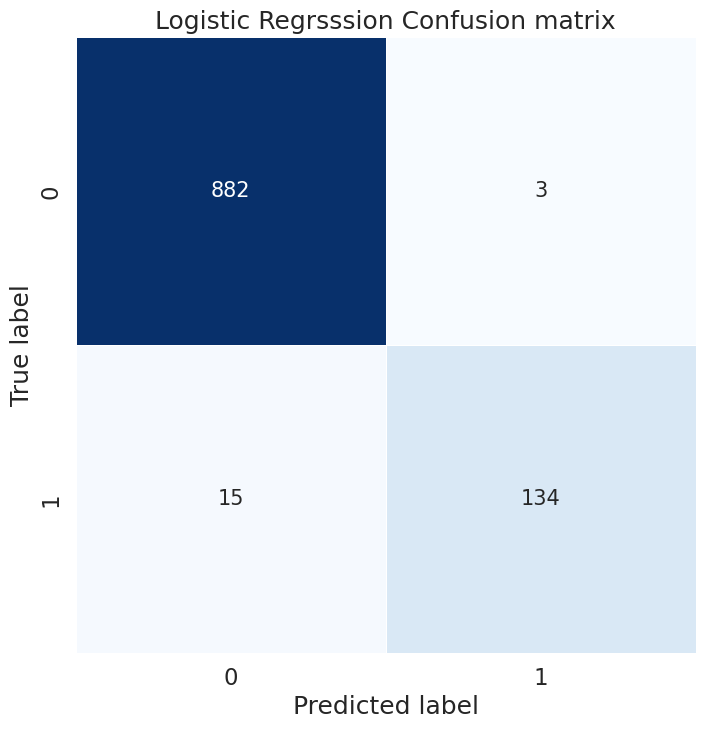

[[882   3]
 [ 15 134]]
Logistic Regrsssion Accuracy score:
Train Score: 0.9903
Train Score: 0.9826
Accuracy: 0.9826
 
Logistic Regrsssion Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.90      0.94       149

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Logistic Regrsssion ROC Accuracy: 0.9811
 
Logistic Regrsssion ROC Curve:


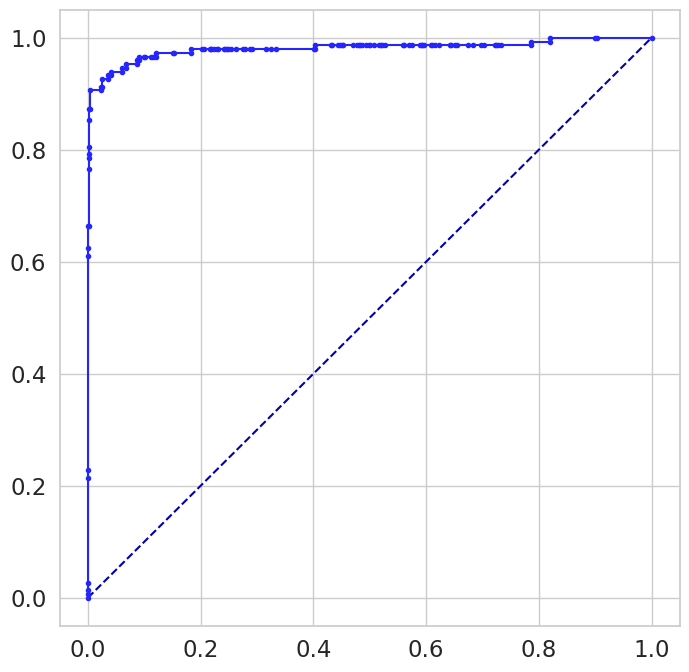

In [26]:
#Logistic Regrsssion
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))

lg_model = LogisticRegression(solver='liblinear', penalty='l1')
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)

plot_confusion_matrix(y_test, lg_pred)
plt.title('Logistic Regrsssion Confusion matrix')
plt.show()
lg_cm = confusion_matrix(y_test, lg_pred, labels=[0, 1])
print(lg_cm)

#4.Logistic Regrsssion Evaluate model
lg_score_train = lg_model.score(X_train,y_train)
lg_score_test = lg_model.score(X_test,y_test)
lg_acc = accuracy_score(y_test,lg_pred)

lg_cr = classification_report(y_test, lg_pred)

lg_prob = lg_model.predict_proba(X_test)
lg_roc = roc_auc_score(y_test, lg_prob[:, 1])
print("Logistic Regrsssion Accuracy score:")
print("Train Score:",round(lg_score_train,4))
print("Train Score:",round(lg_score_test,4))
print("Accuracy:",round(lg_acc,4))
print(" ")
print("Logistic Regrsssion Classification Report:")
print(lg_cr)
print("Logistic Regrsssion ROC Accuracy:",round(lg_roc,4))
print(" ")
print("Logistic Regrsssion ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, lg_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

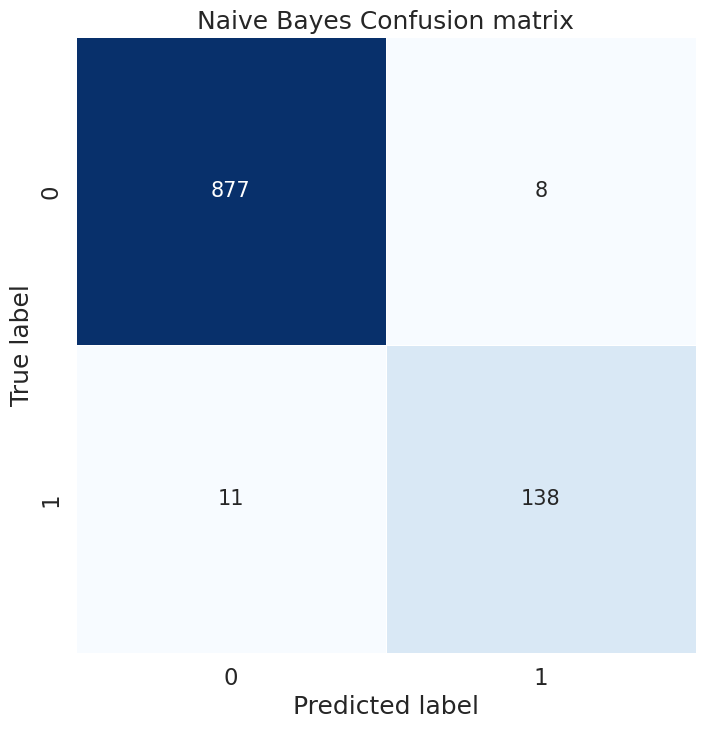

[[877   8]
 [ 11 138]]
Naive Bayes Accuracy score:
Train Score: 0.9918
Train Score: 0.9816
Accuracy: 0.9816
 
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.95      0.93      0.94       149

    accuracy                           0.98      1034
   macro avg       0.97      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Naive Bayes ROC Accuracy: 0.9811
 
Naive Bayes ROC Curve:


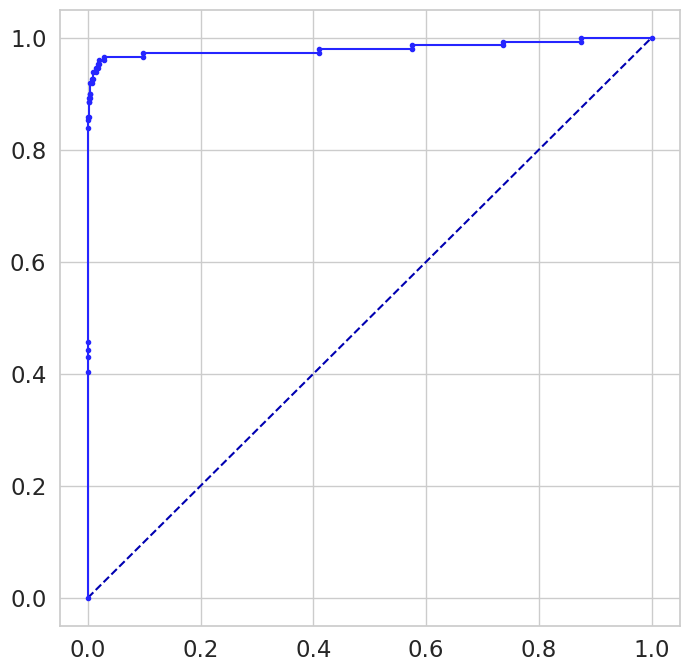

In [27]:
# Naive Bayes model
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
clf = MultinomialNB()
nb_model = clf.fit(X_train, y_train)
nb_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, nb_pred)
plt.title('Naive Bayes Confusion matrix')
plt.show()
nb_cm = confusion_matrix(y_test, nb_pred, labels=[0, 1])
print(nb_cm)
#4.Naive Bayes Evaluate model
nb_score_train = nb_model.score(X_train,y_train)
nb_score_test = nb_model.score(X_test,y_test)
nb_acc = accuracy_score(y_test,nb_pred)

nb_cr = classification_report(y_test, nb_pred)

nb_prob = nb_model.predict_proba(X_test)
nb_roc = roc_auc_score(y_test, lg_prob[:, 1])
print("Naive Bayes Accuracy score:")
print("Train Score:",round(nb_score_train,4))
print("Train Score:",round(nb_score_test,4))
print("Accuracy:",round(nb_acc,4))
print(" ")
print("Naive Bayes Classification Report:")
print(nb_cr)
print("Naive Bayes ROC Accuracy:",round(nb_roc,4))
print(" ")
print("Naive Bayes ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, nb_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)

In [28]:
# Deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# for text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# split data into train and test set
from sklearn.model_selection import train_test_split

2024-04-28 11:15:30.433068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 11:15:30.433218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 11:15:30.604258: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
data['c1'] = data['c1'].map({'spam':1,'ham':0})

In [30]:
X = data['c2'].values
y = data['c1'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [31]:
token = Tokenizer()
token.fit_on_texts(X_train)
encoded_train = token.texts_to_sequences(X_train)
encoded_test = token.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[445, 203, 11, 1511, 3453], [53, 83, 42, 71, 54]]


In [32]:
max_length=8
padded_train = pad_sequences(encoded_train,maxlen = max_length,padding = 'post')
padded_test = pad_sequences(encoded_test,maxlen = max_length,padding='post')
print(padded_train)

[[ 445  203   11 ...    0    0    0]
 [  53   83   42 ...    0    0    0]
 [3454 3455   51 ...   54    0    0]
 ...
 [  54    1   60 ...    6   29 7878]
 [ 563  373  296 ...   86 3450   14]
 [  38   23  351 ... 3136 3137 7879]]


In [33]:
vocab_size = len(token.word_index) + 1
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length = max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model.fit(x= padded_train,
         y = y_train,
         epochs = 10,
         validation_data = (padded_test,y_test),
         verbose=1,
         callbacks = [early_stop])

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8831 - loss: 0.3409 - val_accuracy: 0.9642 - val_loss: 0.1363
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9779 - loss: 0.0718 - val_accuracy: 0.9739 - val_loss: 0.1036
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0286 - val_accuracy: 0.9681 - val_loss: 0.1327
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9966 - loss: 0.0138 - val_accuracy: 0.9691 - val_loss: 0.1651
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.9700 - val_loss: 0.1985
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9700 - val_loss: 0.2005
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9700 - val_loss: 0.2310
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 8.3863e-05 - val_accuracy

In [37]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.94      0.83      0.88       145

    accuracy                           0.97      1034
   macro avg       0.96      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy : 0.9690522243713733
ANN Accuracy score:
Accuracy: 0.9691
 
ANN ROC Accuracy: 0.9127
 
ANN ROC Curve:


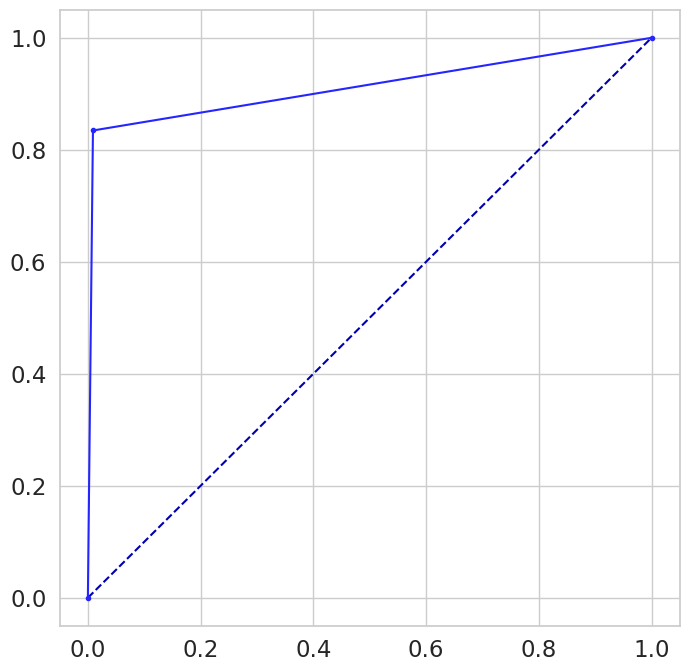

In [39]:
c_report(y_test, preds)
#ann_score_train = model.evaluate(X_train,y_train)
#ann_score_test = model.evaluate(X_test,y_test)
ann_acc = accuracy_score(y_test,preds)
ann_roc = roc_auc_score(y_test, preds)
print("ANN Accuracy score:")
#print("Train Score:",round(ann_score_train,4))
#print("Test Score:",round(ann_score_test,4))
print("Accuracy:",round(ann_acc,4))
print(" ")
print("ANN ROC Accuracy:",round(ann_roc,4))
print(" ")
print("ANN ROC Curve:")
from matplotlib import pyplot as plt
fpr, tpr, threholds = roc_curve(y_test, preds)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--")
ax.plot(fpr, tpr, marker=".")
plt.show(fig)